<a href="https://colab.research.google.com/github/GrzegorzPiedel/DataScience-portfolio/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import os
os.listdir()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


['.config', 'healthcare-dataset-stroke-data.csv', 'sample_data']

# 1. Problem and dataset description

Problem Description:

The aim of this analysis is to predict the likelihood of a stroke based on various demographic, health, and lifestyle factors of the patient. Stroke remains one of the leading causes of death worldwide, and identifying individuals at high risk early on can make a significant difference in preventing its occurrence. By analyzing factors like age, blood pressure, blood sugar levels, smoking habits, and hypertension, we can potentially develop a tool that helps in the early identification of stroke risk in individuals.

Dataset Description:

The dataset used in this project comes from Kaggle and includes data for 5110 patients. It consists of 12 variables, both numerical (such as age, blood pressure, and blood sugar levels) and categorical (like gender and smoking status). The target variable - stroke - is binary, where 0 represents no stroke and 1 indicates that the patient has had a stroke. The data includes both patients who have suffered from a stroke and those who have not. The goal is to predict whether a patient is at risk of having a stroke based on their health profile.

In [ ]:
import pandas as pd

#Data import
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.columns = ['id', 'gender', 'age', 'hypertension', 'heart disease', 'ever married', 'work type', 'residence type', 'avg glucose level', 'bmi', 'smoking status', 'stroke']

#Basic exploration of the dataset
print('First 5 rows of the dataset:')
print(data.head())

print('\nBasic statistics:')
print(data.describe())

print('\nData types:')
print(data.dtypes)

print('\nMissing data:')
print(data.isnull().sum())

First 5 rows of the dataset:
      id  gender   age  hypertension  heart disease ever married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work type residence type  avg glucose level   bmi   smoking status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Basic statistics:
        

# 2. EDA

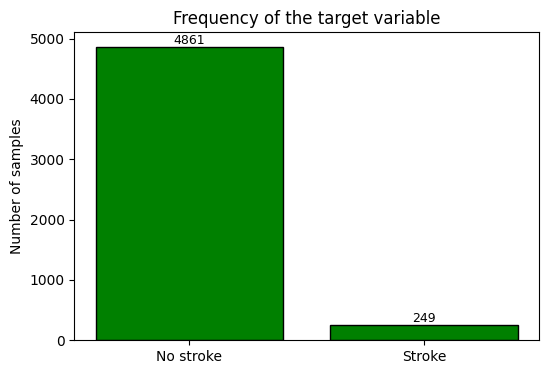

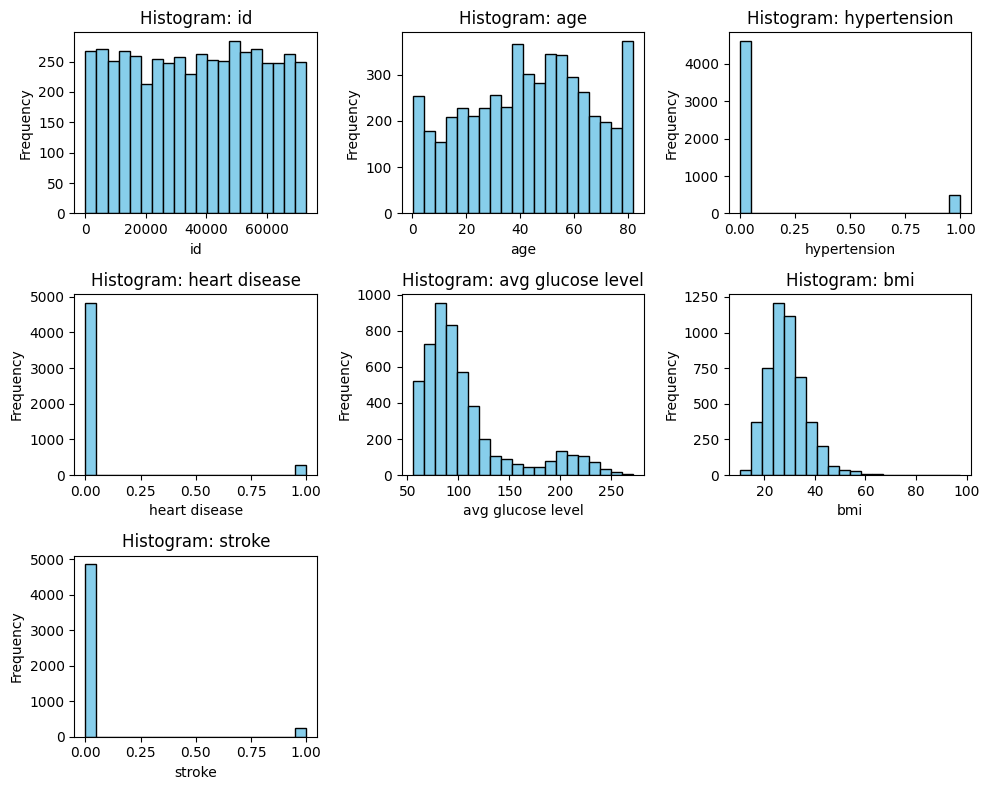

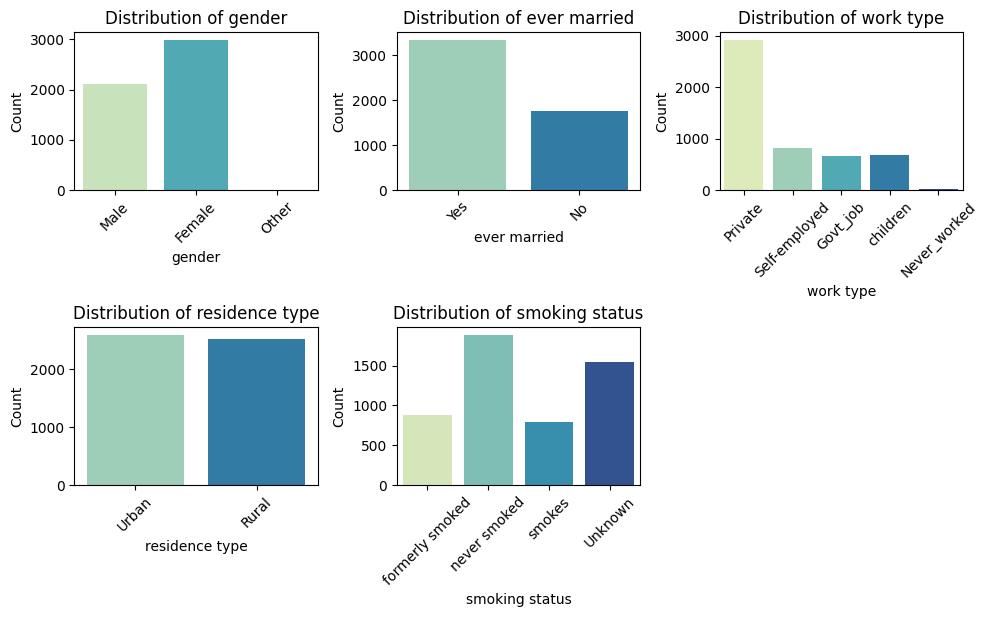

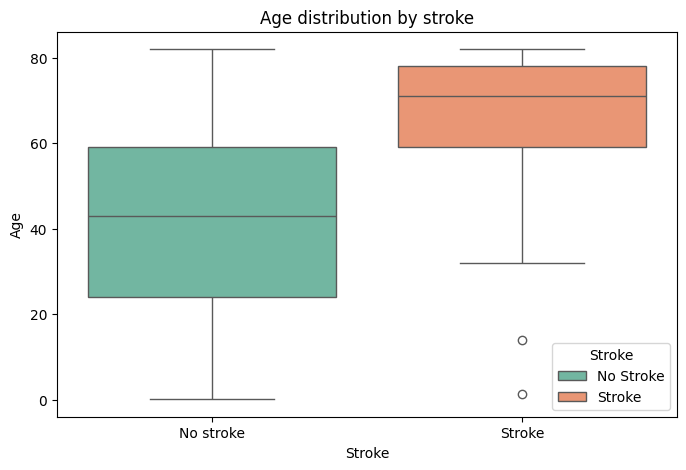

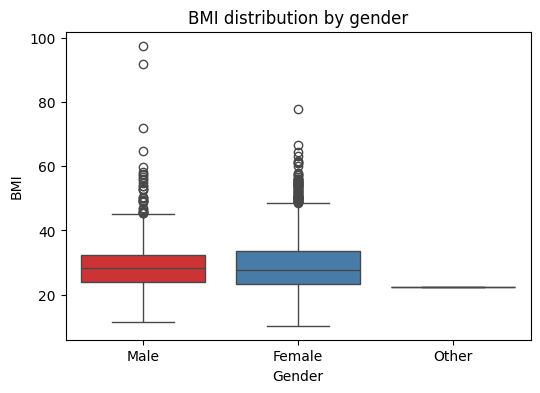

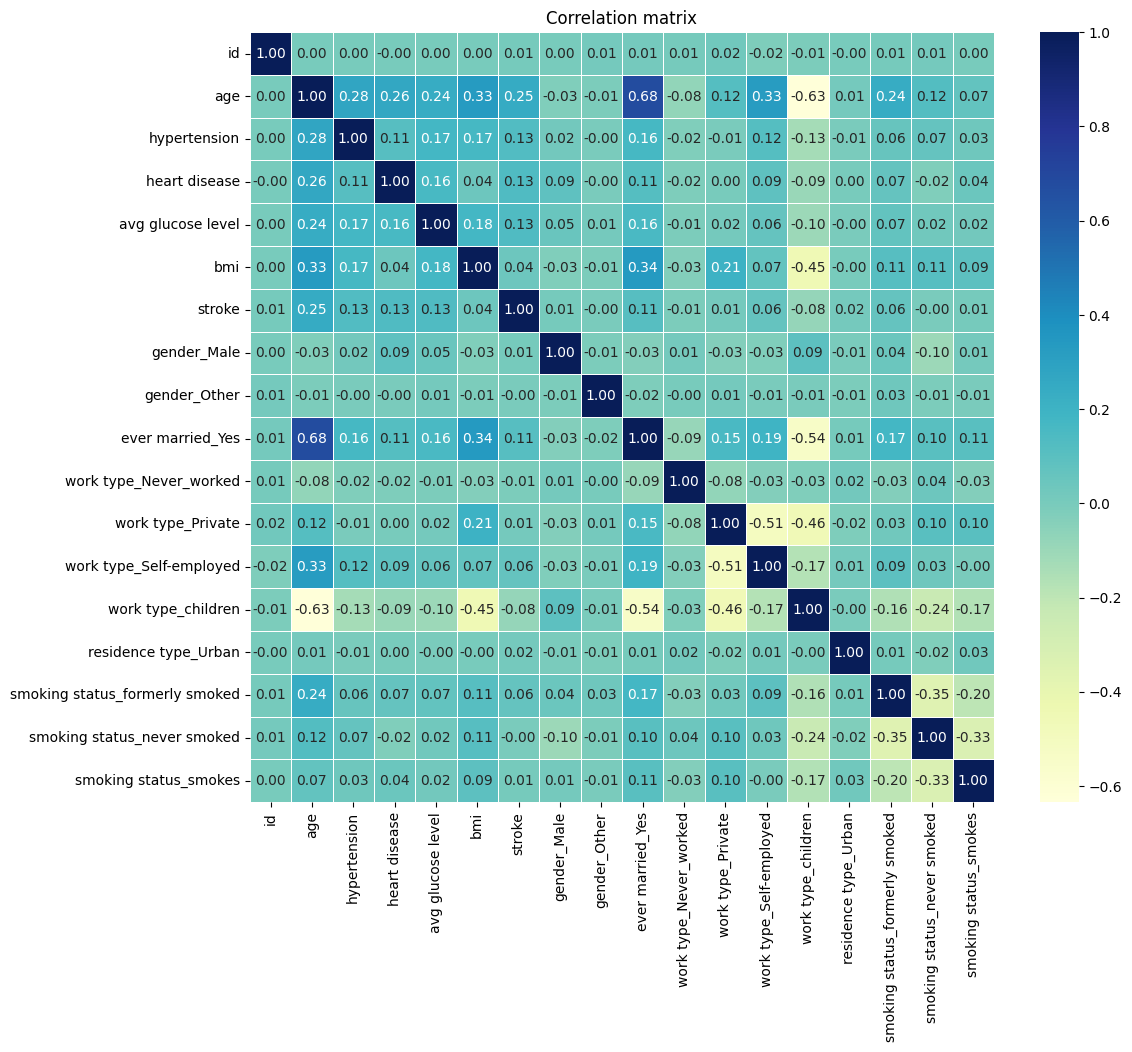

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking the distribution of the target variable 'stroke'
stroke_counts = data['stroke'].value_counts()

plt.figure(figsize=(6, 4))
bars =plt.bar(['No stroke', 'Stroke'], stroke_counts, color='green', ec='black')
for bar, count in zip(bars, stroke_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{count}',
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.title('Frequency of the target variable')
plt.ylabel('Number of samples')
plt.show()

#Histograms for the numerical data
numerical_columns= data.select_dtypes(include = ['float64', 'int64']).columns

plt.figure(figsize = (10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[col], bins = 20, color ='skyblue', edgecolor = 'black')
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\n')
plt.show()

#Distribution of the categorical data
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x = col, data = data, palette = 'YlGnBu', hue = col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.ylabel('Count')
plt.tight_layout()
print('\n')
plt.show()

#Age distribution by stroke
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'stroke', y = 'age', data = data, palette = 'Set2', hue = data['stroke'])
plt.title('Age distribution by stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.legend(title = 'Stroke', labels = ['No Stroke', 'Stroke'], loc = 'lower right')
plt.xticks(['0', '1'], ['No stroke', 'Stroke'])
print('\n')
plt.show()

#Analysis of the BMI factor by gender
plt.figure(figsize=(6, 4))
sns.boxplot(x = 'gender', y = 'bmi', data = data, palette = 'Set1', hue = data['gender'])
plt.title('BMI distribution by gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
print('\n')
plt.show()

#Correlation matrix
encoded_data = pd.get_dummies(data, drop_first=True)
plt.figure(figsize = (12, 10))
sns.heatmap(encoded_data.corr(), annot = True, cmap='YlGnBu', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix')
print('\n')
plt.show()

1. Target Variable Distribution (Stroke)

    Looking at the distribution of the target variable, stroke, we can see a significant imbalance between the two classes. Most patients (4861) have not had a stroke, while only 249 patients have experienced one. This imbalance could impact the performance of machine learning models, and we may need to use techniques like oversampling or adjusting class weights in the future
2. Distribution of numerical features

    For the numerical variables, histograms were used to understand their distribution:
    - Age is spread across various ranges, with a higher concentration between 40 and 60 years
    - Glucose levels are skewed, with most values clustered between 50 and 150
    - BMI has a roughly normal distribution, but there are a few extreme outliers, suggesting potential data quality issues or cases of extreme obesity
3. Distribution of categorical features:
    - Gender: There are slightly more female patients than male
    - Marital Status: The majority of patients have never been married
    - Work Type: Most patients work in the private sector, with fewer in government jobs or as self-employed
    - Residence Type: The distribution is nearly equal between urban and rural areas, though urban residents slightly outnumber rural ones
    - Smoking Status: The majority of patients have never smoked, followed by those who smoke and those who have smoked in the past
4. Age distribution by stroke

    Boxplots show that patients who have suffered a stroke tend to be older than those who have not. The median age for stroke patients is around 60-70 years, while non-stroke patients are typically younger, with a median age around 40-50 years. This suggests that age plays a significant role in stroke risk
5. BMI distribution by gender

    When comparing BMI between genders using a boxplot, the following trends show up:
    - Males tend to have a slightly higher median BMI compared to females, but there are notable outliers for both genders
    - The 'Other' category has very few data points, and its BMI distribution is not significant
6. Correlation matrix

    The correlation matrix reveals several important relationships:
    - Age is positively correlated with both BMI and glucose levels, meaning older patients tend to have higher BMI and glucose levels
    - There is a positive correlation between hypertension and heart disease, suggesting that individuals with one condition are more likely to have the other
    - BMI and glucose levels also show a meaningful correlation, which is consistent with the known link between obesity and diabetes
7. Additional Observations
    - Missing Data: There is missing data in the 'bmi' colunmn, which means the data imputation is needed
    - Class Imbalance: The significant imbalance between stroke and non-stroke patients will need to be addressed during model training to avoid biased predictions

# 3. Data preparation

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = data.drop(columns=['stroke', 'id'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['age', 'avg glucose level', 'bmi', 'hypertension', 'heart disease']

numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Balancing the training dataset using SMOTE
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_transformed, y_train)

print('\nOriginal training set:', X_train_transformed.shape, 'stroke cases:', sum(y_train))
print('Balanced training set:', X_train_balanced.shape, 'stroke cases:', sum(y_train_balanced))


Original training set: (4088, 20) stroke cases: 187
Balanced training set: (7802, 20) stroke cases: 3901


# 4. Learning Models and searching for the parameters

Chosen models:

- Random Forest is a strong and flexible model that handles tabular data very well, even when features are on different scales. It’s also quite robust to outliers and doesn’t usually require much tuning to get good results

- Logistic Regression is a classic linear approach-fast to train and easy to interpret, which makes it a great baseline for comparison

- K-Nearest Neighbors (KNN) is an intuitive, non-parametric method that bases its predictions on how similar data points are to each other. It often complements more advanced models nicely

Note:

When I first tested the models, I quickly noticed a major issue: there were very few positive (stroke) cases in the data compared to the number of negative ones. Because of this, all of the models just predicted the majority class every time, and none of them managed to correctly identify a single stroke case. This problem showed up clearly in the confusion matrixes and in the metrics recall and precision for the stroke class were both zero.

To solve this, I used SMOTE technique to balance out the classes in the training set. With SMOTE, the minority class is boosted by generating synthetic stroke samples, which helps the models learn what a stroke case actually looks like. After this adjustment, the models had a much better chance of detecting the minority class and their predictions became more meaningful.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

#Random Forest - RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200, 300, 400,],
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state = 42, class_weight='balanced')
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state = 42)
rf_search.fit(X_train_balanced, y_train_balanced)
print('Random Forest:', rf_search.best_params_)

#Logistic Regression - GridSearchCV
lr_params = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr_search = GridSearchCV(lr, lr_params, cv=5)
lr_search.fit(X_train_balanced, y_train_balanced)
print('Logistic Regression:', lr_search.best_params_)

#KNeighbortsvClassifier - GridSearchCV
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, knn_params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_search.fit(X_train_balanced, y_train_balanced)
print('Best KNN Params:', knn_search.best_params_)

Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}
Logistic Regression: {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
Best KNN Params: {'n_neighbors': 7}


# 5. Assessment and interpretation of model *results*


                 Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.925636   0.150000  0.048387  0.073171
1  Logistic Regression  0.750489   0.170648  0.806452  0.281690
2                  KNN  0.800391   0.148515  0.483871  0.227273




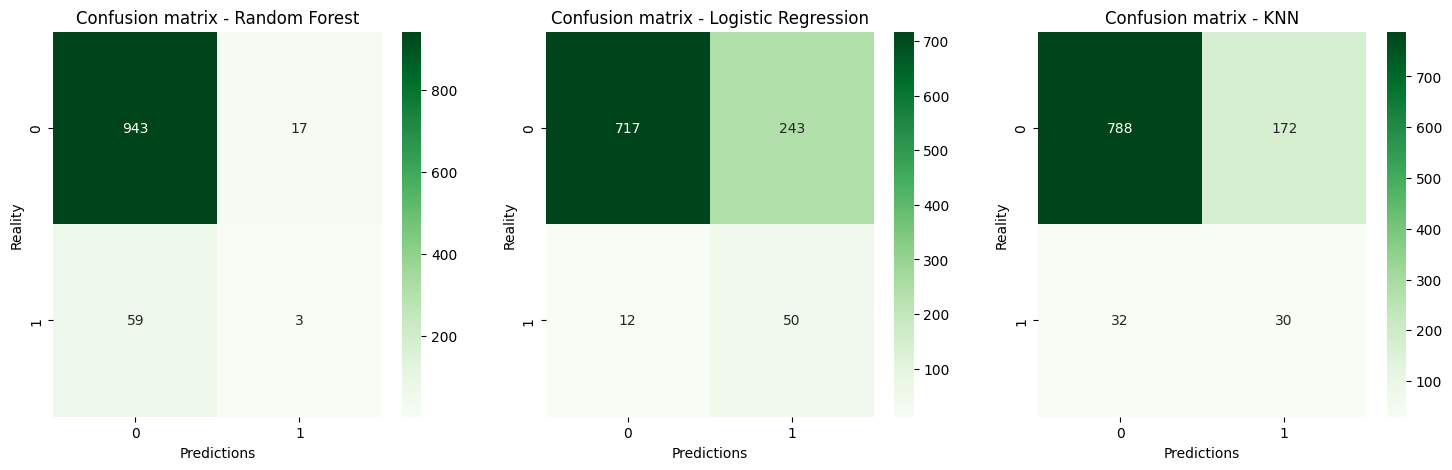

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RF_pred = rf_search.best_estimator_.predict(X_test_transformed)
LR_pred = lr_search.best_estimator_.predict(X_test_transformed)
KNN_pred = knn_search.best_estimator_.predict(X_test_transformed)

#Metrics
model_names = ['Random Forest', 'Logistic Regression', 'KNN']
preds= [RF_pred, LR_pred, KNN_pred]
metrics= []

for name, y_pred in zip(model_names, preds):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

results_df = pd.DataFrame(metrics)
print(results_df.round(6))
print('\n')

#Confusion matrix - chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (model_name, y_pred) in enumerate(zip(model_names, preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap="Greens")
    axes[i].set_title(f"Confusion matrix - {model_name}")
    axes[i].set_xlabel("Predictions")
    axes[i].set_ylabel("Reality")
plt.show()

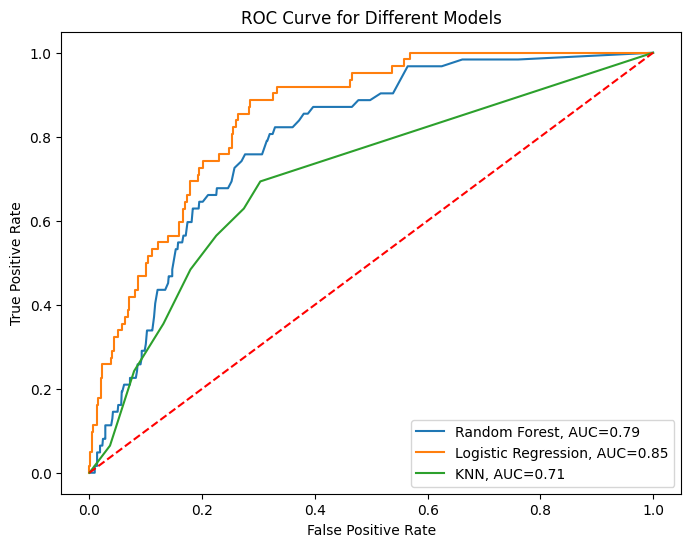

In [ ]:
#ROC curve and AUC
from sklearn.metrics import roc_curve, auc

models = {
    'Random Forest': rf_search.best_estimator_,
    'Logistic Regression': lr_search.best_estimator_,
    'KNN': knn_search.best_estimator_
}

def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label}, AUC={auc_score:.2f}')

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    plot_roc_curve(model, X_test_transformed, y_test, model_name)

plt.plot([0, 1], [0, 1], color="red", linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Different Models")
plt.legend()
plt.show()

The results highlight the challenge of class imbalance in stroke prediction. Although Random Forest achieved the highest accuracy, it failed to detect most stroke cases. Logistic Regression provided much better recall and F1 score, meaning it was able to identify the majority of stroke cases, even though it also produced more false positives. KNN's performance was between the other two models but still fell short of effectively identifying strokes. In this context, recall and F1 are more informative than accuracy, making Logistic Regression the most effective choice for this dataset.

 # 6. Final Conclusions and Possible Improvements

Based on the results, it’s clear that class imbalance was the biggest challenge in this project. Although Random Forest had the highest overall accuracy, it mostly just predicted the majority class and missed most stroke cases. Logistic Regression turned out to be much better at picking up actual strokes, even though it sometimes produced more false positives. For this type of medical problem, catching real stroke cases is much more important than simply achieving high accuracy.

A major limitation here was the small number of positive (stroke) examples. That made it tough for the models to really “learn” what a stroke case looks like. Using SMOTE helped balance things out, but it’s likely the results would be better if we had more stroke data to work with.

Looking ahead, this project could be improved by:
- adding more data - especially more positive cases
- possibly by combining datasets or including information from other sources
- it might also help to try other oversampling techniques, explore new features, or test additional algorithms

Overall, this analysis shows just how important it is to handle class imbalance and to use the right evaluation criteria when building models for rare but critical medical events like strokes.